In [198]:
import pandas as pd
import quandl
import numpy as np
from sklearn import preprocessing,cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [199]:
df = quandl.get('WIKI/GOOGL')

In [200]:
copy_df = df

In [201]:
copy_df.dropna(axis=0,how='any')

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.010,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.010,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.760,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.240,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.760,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0
2004-08-26,104.950,107.95,104.66,107.910,7094800.0,0.0,1.0,52.637487,54.142132,52.492038,54.122070,7094800.0
2004-08-27,108.100,108.62,105.69,106.150,6211700.0,0.0,1.0,54.217364,54.478169,53.008633,53.239345,6211700.0
2004-08-30,105.280,105.49,102.01,102.010,5196700.0,0.0,1.0,52.802998,52.908323,51.162935,51.162935,5196700.0
2004-08-31,102.320,103.71,102.16,102.370,4917800.0,0.0,1.0,51.318415,52.015567,51.238167,51.343492,4917800.0


In [202]:
copy_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

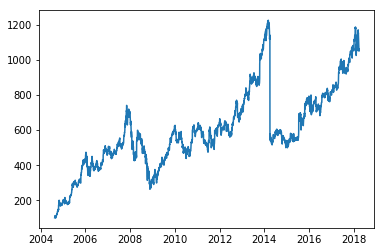

In [203]:
plt.plot(copy_df.index,copy_df['Open'])

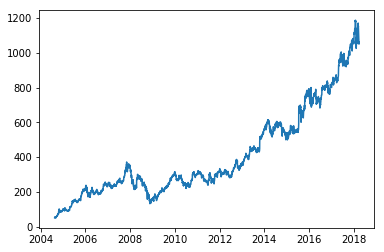

In [204]:
plt.plot(copy_df.index,copy_df['Adj. Open'])

In [205]:
copy_df.index.get_loc('2014-01-02')

2359

In [206]:
copy_df.loc['2014-04-02':'2014-12-31',:]

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2014-04-02,1141.900,1144.8000,1124.0000,1135.10,4168000.0,0.000000,1.0,572.717925,574.172415,563.740212,569.307397,4168000.0
2014-04-03,573.390,588.3000,566.0100,571.50,4018300.0,567.971668,1.0,573.390000,588.300000,566.010000,571.500000,4018300.0
2014-04-04,578.550,579.7173,544.4940,545.25,5363700.0,0.000000,1.0,578.550000,579.717300,544.494000,545.250000,5363700.0
2014-04-07,544.790,549.8500,530.5300,540.63,3961600.0,0.000000,1.0,544.790000,549.850000,530.530000,540.630000,3961600.0
2014-04-08,545.050,559.8800,544.7000,557.51,3482500.0,0.000000,1.0,545.050000,559.880000,544.700000,557.510000,3482500.0
2014-04-09,565.840,567.8000,555.3800,567.04,3031600.0,0.000000,1.0,565.840000,567.800000,555.380000,567.040000,3031600.0
2014-04-10,568.000,568.2100,545.5000,546.69,3294500.0,0.000000,1.0,568.000000,568.210000,545.500000,546.690000,3294500.0
2014-04-11,537.940,547.5900,533.4000,537.76,3174700.0,0.000000,1.0,537.940000,547.590000,533.400000,537.760000,3174700.0
2014-04-14,543.660,553.0200,540.5200,545.20,2541200.0,0.000000,1.0,543.660000,553.020000,540.520000,545.200000,2541200.0


In [207]:
copy_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [208]:
copy_df = copy_df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio'],axis=1)
copy_df['Fluctuate Rate'] = (copy_df['Adj. High'] - copy_df['Adj. Low']) / (copy_df['Adj. Close'])

In [209]:
copy_df['Hi/volume'] = copy_df['Adj. High'] / copy_df['Adj. Volume'] * 1000

In [210]:
y = copy_df['Adj. Close']
y = y.shift(-30)
y = y.dropna(axis=0,how = 'any')
X = copy_df.drop(['Adj. High', 'Adj. Low', 'Adj. Close'],axis=1)
X = X[:-30]

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101,shuffle = False)

In [212]:
reg = LinearRegression()

In [213]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [214]:
predictions = reg.predict(X_test)

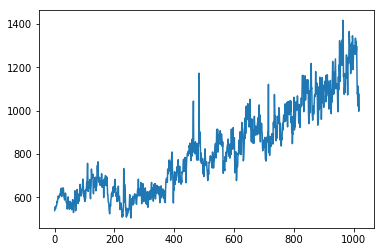

In [215]:
plt.plot(list(predictions))